In [1]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import pymc3 as pm

### Pre Processing

In [4]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
from patsy import demo_data

In [7]:
df = pd.read_csv("Lawsuit.csv")

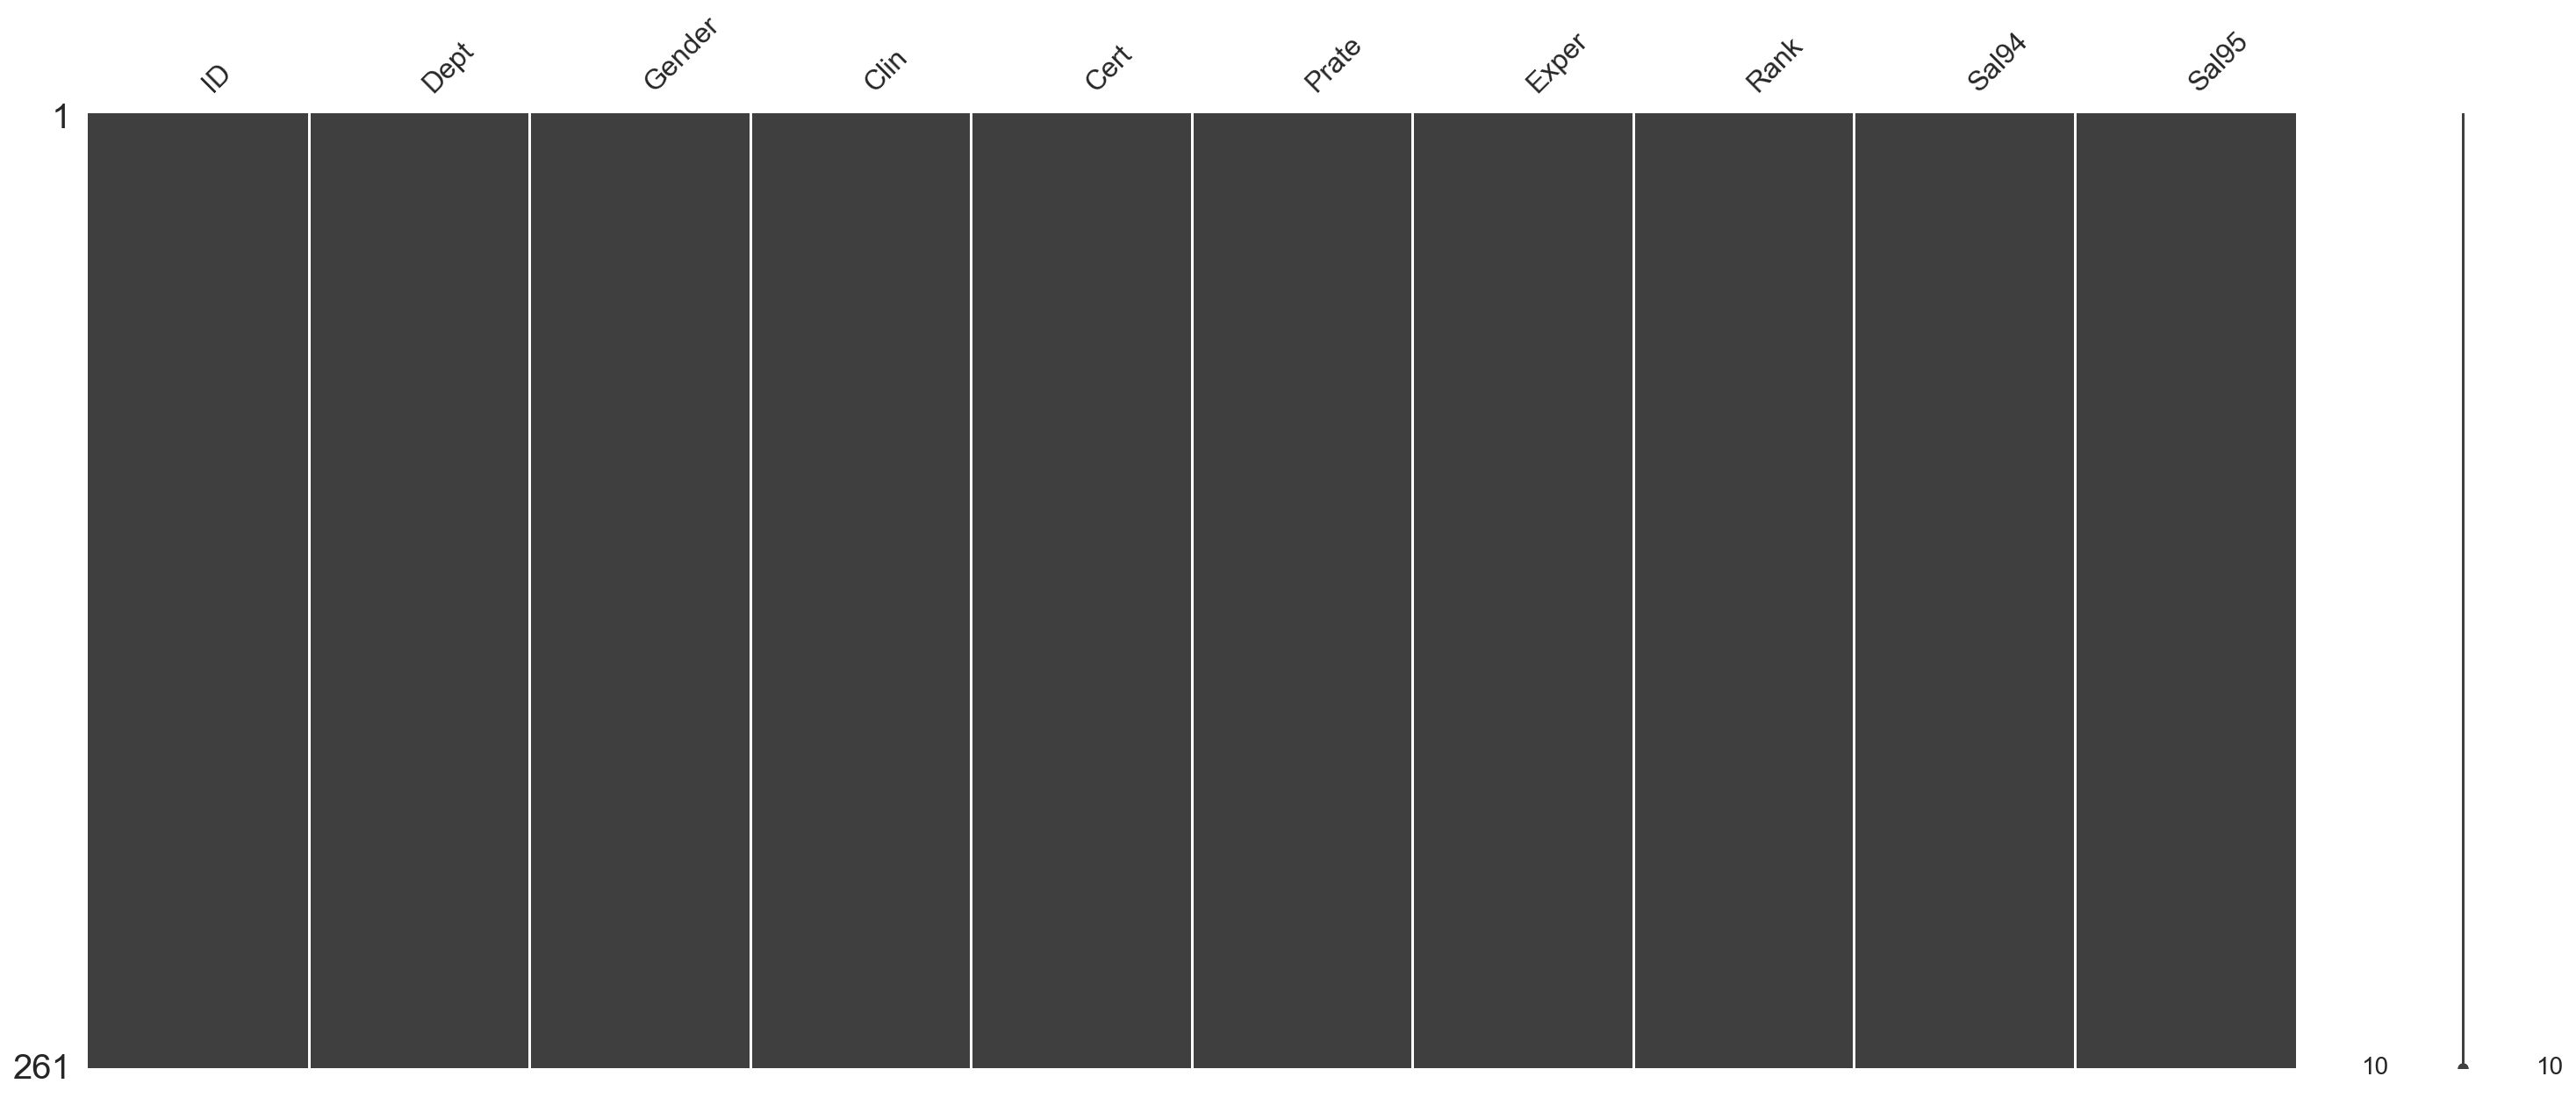

In [8]:
msno.matrix(df)
plt.show()

<AxesSubplot:>

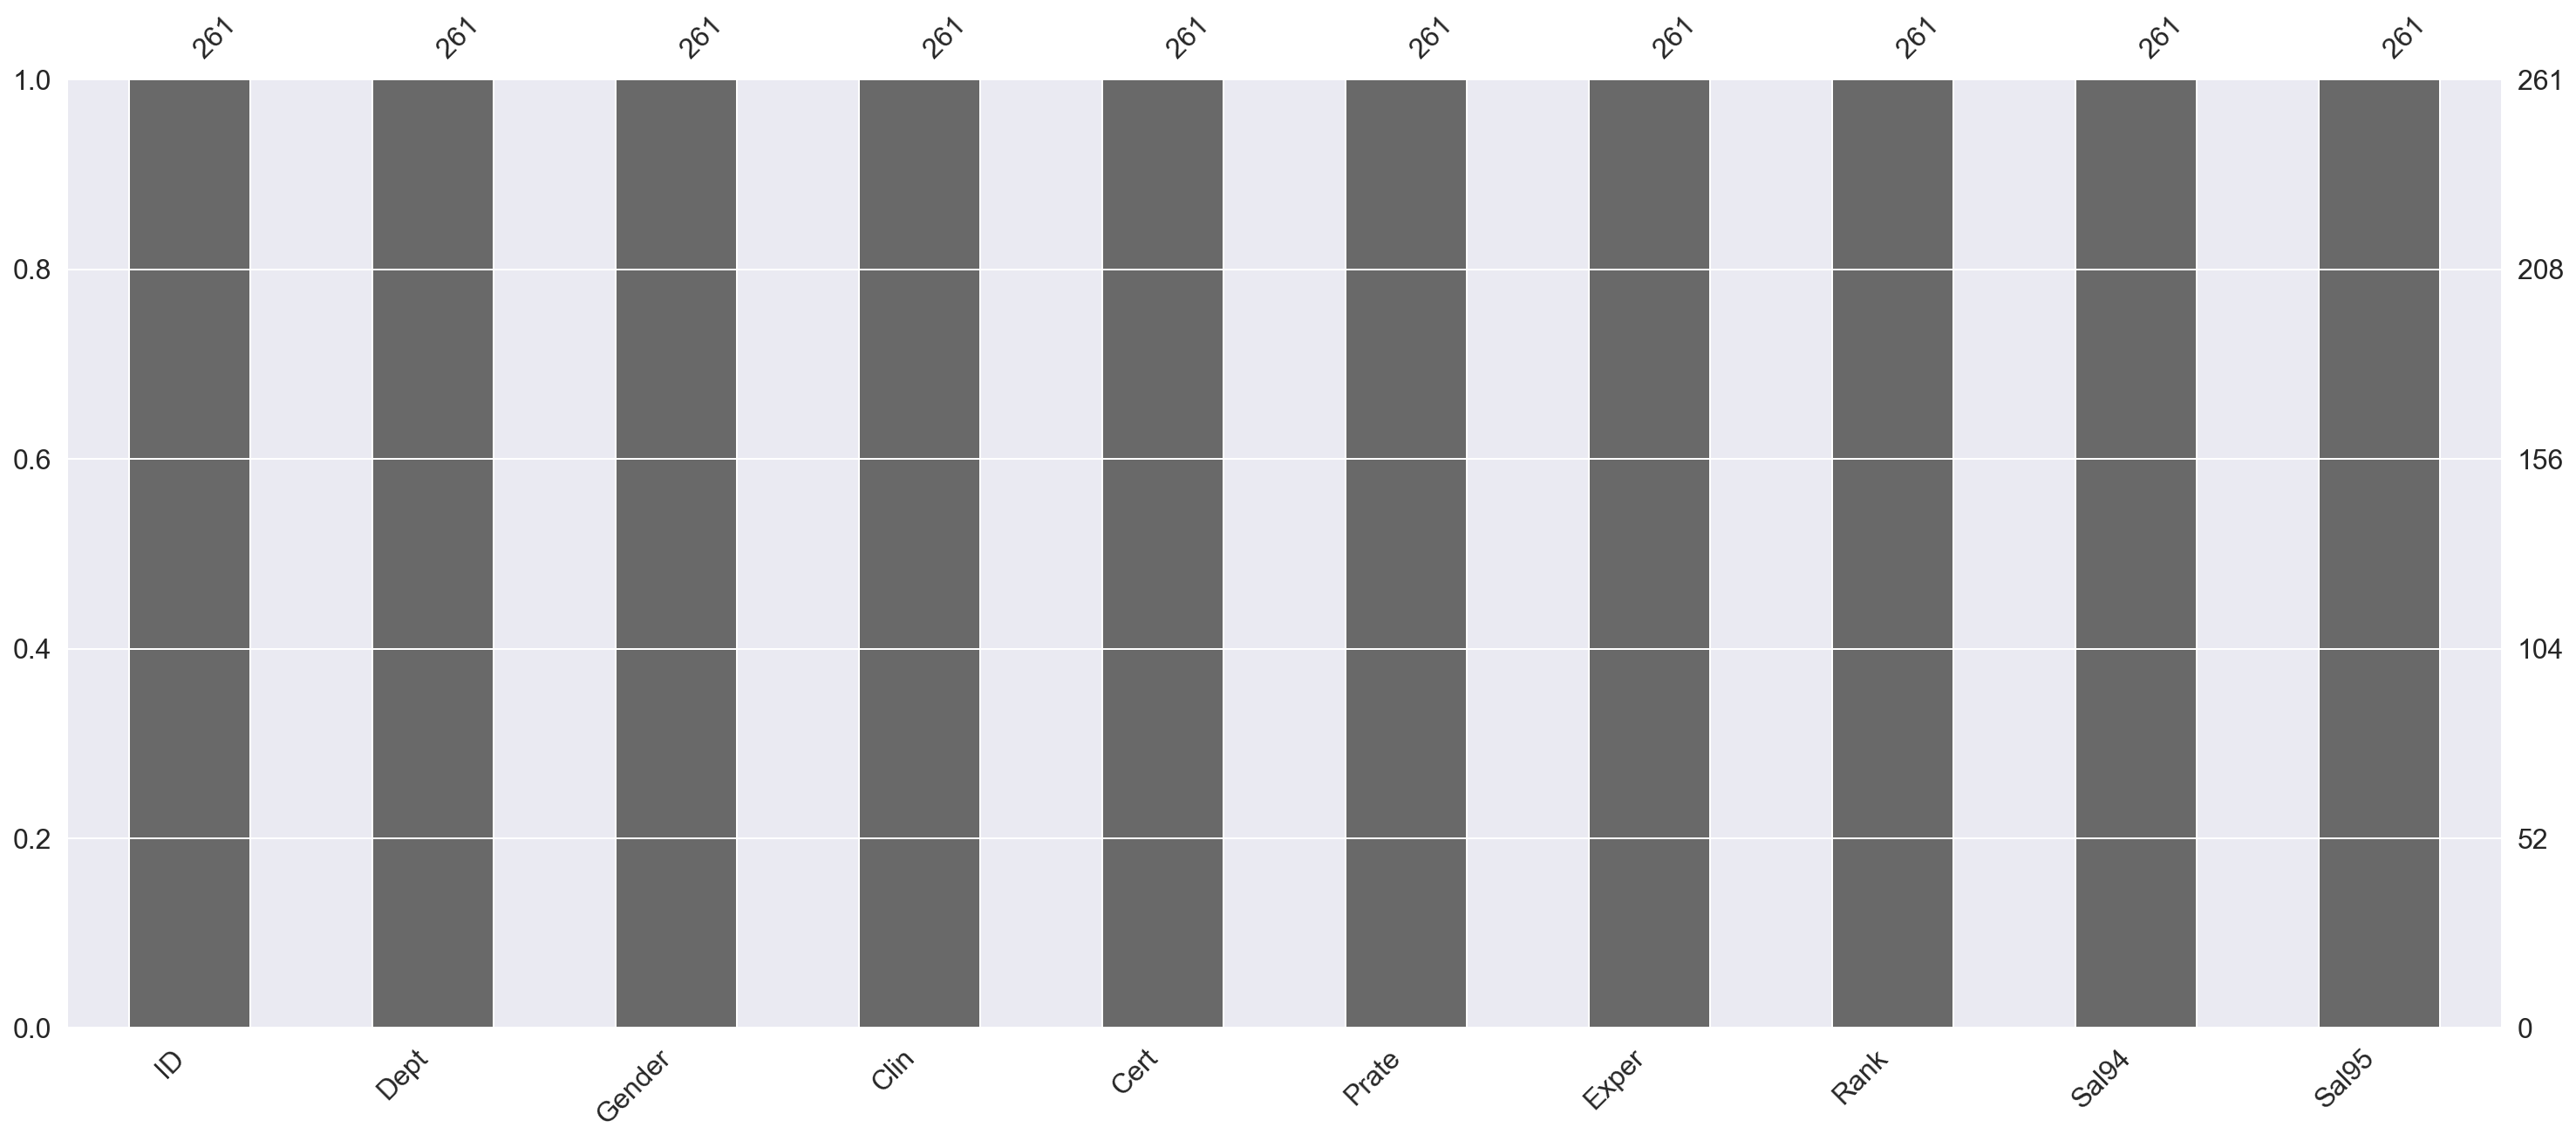

In [9]:
msno.bar(df)

In [14]:
df.isna().sum()

ID        0
Dept      0
Gender    0
Clin      0
Cert      0
Prate     0
Exper     0
Rank      0
Sal94     0
Sal95     0
dtype: int64

#### Nothing to do

In [19]:
colnames = df.columns
colnames

Index(['ID', 'Dept', 'Gender', 'Clin', 'Cert', 'Prate', 'Exper', 'Rank',
       'Sal94', 'Sal95'],
      dtype='object')

In [524]:
df['Gender']==1

0       True
1       True
2       True
3       True
4       True
       ...  
256    False
257    False
258    False
259    False
260    False
Name: Gender, Length: 261, dtype: bool

In [527]:
dept_man = df.loc[df['Gender']==1, colnames[3]]

In [528]:
dept_man = df.loc[df['Gender']==1, 'Dept']
dept_woman = df.loc[df['Gender']==0, 'Dept']
# gender = df[colnames[2]]
clin_man = df.loc[df['Gender']==1, colnames[3]]
clin_woman = df.loc[df['Gender']==0, colnames[3]]

cert_man = df.loc[df['Gender']==1, colnames[4]]
cert_woman = df.loc[df['Gender']==0, colnames[4]]

prate_man = df.loc[df['Gender']==1, colnames[5]]
prate_woman = df.loc[df['Gender']==0, colnames[5]]


exper_man = df.loc[df['Gender']==1, colnames[6]]
exper_woman = df.loc[df['Gender']==0, colnames[6]]

### Exper Column

In [461]:
exper.shape[0]

261

In [465]:
np.unique(exper)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 32, 37])

In [488]:
exper.value_counts().index

Int64Index([ 5, 10,  8,  6,  9,  7, 11, 14,  4, 16, 12,  2, 15, 13,  3, 18, 27,
            21, 23, 25, 37, 17, 19, 22,  1, 32, 24, 26],
           dtype='int64')

In [529]:
exper_man_p = exper_man.value_counts()/exper_man.shape[0]
exper_woman_p = exper_woman.value_counts()/exper_woman.shape[0]

In [564]:
exper_man_samples = np.random.choice(a=exper_man_p.index, size=3100, p=exper_man_p)
exper_woman_samples = np.random.choice(a=exper_woman_p.index, size=2120, p=exper_woman_p)
exper_man_samples[100:150]

array([ 5,  8,  5,  6,  5,  9, 12,  7, 10, 26, 11, 10,  6, 21,  6,  6, 10,
       25, 18, 10, 10, 16, 24, 11,  5, 15,  7, 10,  5,  4,  5, 19, 13, 10,
        6, 18, 27,  8,  6, 11,  9,  5,  6,  4,  8, 12,  7,  9, 11, 15])

In [566]:
exper_man_samples.shape, exper_woman_samples.shape

((3100,), (2120,))

#### Cert Column

In [34]:
# inference to Bernoulli
np.unique(cert)

array([0, 1])

In [ ]:
[(cert_man.shape[0]-sum(cert_man))/cert_man.shape[0], sum(cert_man)/cert_man.shape[0]]

In [671]:
cert_man_samples = np.random.choice(a=[0, 1], size=3100, p=[(cert_man.shape[0]-sum(cert_man))/cert_man.shape[0], sum(cert_man)/cert_man.shape[0]])       
cert_man_samples.shape

(3100,)

In [ ]:
[(cert_woman.shape[0]-sum(cert_woman))/cert_woman.shape[0], sum(cert_woman)/cert_woman.shape[0]]

In [665]:
cert_woman_samples = np.random.choice(a=[0, 1], size=2120, p=[(cert_woman.shape[0]-sum(cert_woman))/cert_woman.shape[0], sum(cert_woman)/cert_woman.shape[0]])       
cert_woman_samples.shape

(2120,)

#### Clin Column

In [428]:
# inference to Bernoulli
np.unique(clin)

array([0, 1])

In [567]:
clin_man.shape[0]

155

In [569]:
clin_woman.shape

(106,)

In [570]:
[(clin_man.shape[0]-sum(clin_man))/clin_man.shape[0], sum(clin_man)/clin_man.shape[0]]

[0.3548387096774194, 0.6451612903225806]

In [575]:
clin_man_samples = np.random.choice(a=[0, 1], size=3100, p=[(clin_man.shape[0]-sum(clin_man))/clin_man.shape[0], sum(clin_man)/clin_man.shape[0]])       
clin_man_samples[100:150], clin_man_samples.shape

(array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1]),
 (3100,))

In [576]:
clin_woman_samples = np.random.choice(a=[0, 1], size=2120, p=[(clin_woman.shape[0]-sum(clin_woman))/clin_woman.shape[0], sum(clin_woman)/clin_woman.shape[0]])       
clin_woman_samples[100:150], clin_woman_samples.shape

(array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 1]),
 (2120,))

#### Dept Column

inference to category distribution

In [46]:
np.unique(dept)

array([1, 2, 3, 4, 5, 6])

In [581]:
dept_man_df = pd.DataFrame(dept_man)
dept_man_df.columns

Index(['Dept'], dtype='object')

In [582]:
dept_man_df['Dept'] = dept_man_df.Dept.astype('str')

In [583]:
dept_man_encoded = pd.get_dummies(dept_man_df)

In [584]:
dept_man_encoded

,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
251,0,0,0,0,0,1
252,0,0,0,0,0,1
253,0,0,0,0,0,1
254,0,0,0,0,0,1


In [672]:
preal=[round(i, 2) for i in dept_man_encoded.apply(sum)/155]
sum(preal+[1/6])
preal = [i/sum(preal) for i in preal]
sum(preal)
preal

[0.19191919191919193,
 0.13131313131313133,
 0.06060606060606061,
 0.06060606060606061,
 0.32323232323232326,
 0.23232323232323235]

In [673]:
dept_man_samples = np.random.choice(a=[1, 2, 3, 4, 5, 6], size=3100, p=preal)       

In [674]:
dept_man_samples

array([1, 3, 6, ..., 5, 5, 5])

In [675]:
dept_woman_df = pd.DataFrame(dept_woman)
dept_woman_df.columns

Index(['Dept'], dtype='object')

In [676]:
dept_woman_df['Dept'] = dept_woman_df.Dept.astype('str')

In [677]:
dept_woman_encoded = pd.get_dummies(dept_woman_df)

In [678]:
dept_woman_encoded

,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
30,1,0,0,0,0,0
31,1,0,0,0,0,0
32,1,0,0,0,0,0
33,1,0,0,0,0,0
34,1,0,0,0,0,0
...,...,...,...,...,...,...
256,0,0,0,0,0,1
257,0,0,0,0,0,1
258,0,0,0,0,0,1
259,0,0,0,0,0,1


In [679]:
preal=[round(i, 2) for i in dept_woman_encoded.apply(sum)/155]
sum(preal+[1/6])
preal = [i/sum(preal) for i in preal]
sum(preal)
# preal

1.0

In [680]:
dept_woman_samples = np.random.choice(a=[1, 2, 3, 4, 5, 6], size=2120, p=preal)       

In [681]:
dept_woman_samples

array([3, 3, 5, ..., 4, 6, 4])

#### Prate Column

sampling with Gaussian Mixture model

In [85]:
import arviz as az

In [35]:
np.unique(prate)

array([1.3, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.3, 8.4, 8.5,
       8.6, 8.7])

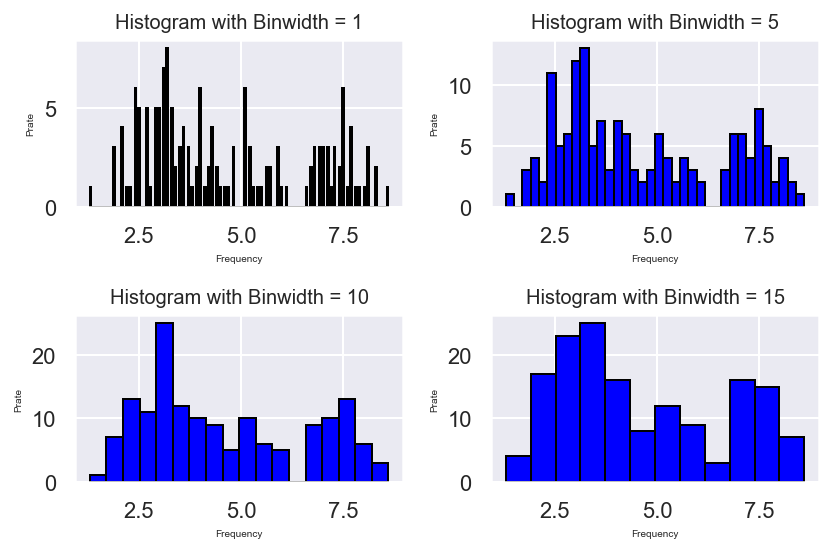

In [530]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(prate_man, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Frequency', size = 5)
    ax.set_ylabel('Prate', size= 5)

plt.tight_layout()
plt.show()

In [532]:
with pm.Model() as model:
    w = pm.Dirichlet("w", [1., 1., 1.])
    mu = pm.Normal("mu", 0.0, 10.0, shape=3)
    tau = pm.Gamma("tau", 1.0, 1.0, shape=3)

    x_obs = pm.NormalMixture("x_obs", w, mu, tau=tau, observed=prate_man)

In [533]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5, step=step, start=start)
    

    # sample posterior predictive samples
    ppc_trace = pm.sample_posterior_predictive(trace, var_names=["x_obs"])
    print(ppc_trace['x_obs'].shape)

    # Get an arviz inference object
    idata_pymc3 = az.from_pymc3(trace, posterior_predictive=ppc_trace)

Only 5 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]


Sampling 4 chains for 1_000 tune and 5 draw iterations (4_000 + 20 draws total) took 22 seconds.


(20, 155)


In [534]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],3.335,0.688,2.717,4.609,0.157,0.113,19.0,19.0,1.52
mu[1],5.193,1.372,4.226,7.511,0.313,0.224,19.0,19.0,1.69
mu[2],6.220,1.984,2.774,7.449,0.452,0.325,19.0,19.0,2.47
w[0],0.386,0.067,0.319,0.528,0.015,0.011,19.0,19.0,1.92
w[1],0.322,0.066,0.208,0.389,0.015,0.011,19.0,16.0,1.84
w[2],0.292,0.078,0.208,0.391,0.018,0.013,19.0,19.0,1.67
tau[0],2.174,1.028,0.548,3.470,0.234,0.168,19.0,16.0,2.75
tau[1],1.530,1.179,0.670,3.542,0.269,0.193,19.0,19.0,2.29
tau[2],3.159,0.684,2.472,4.610,0.156,0.112,19.0,16.0,1.97


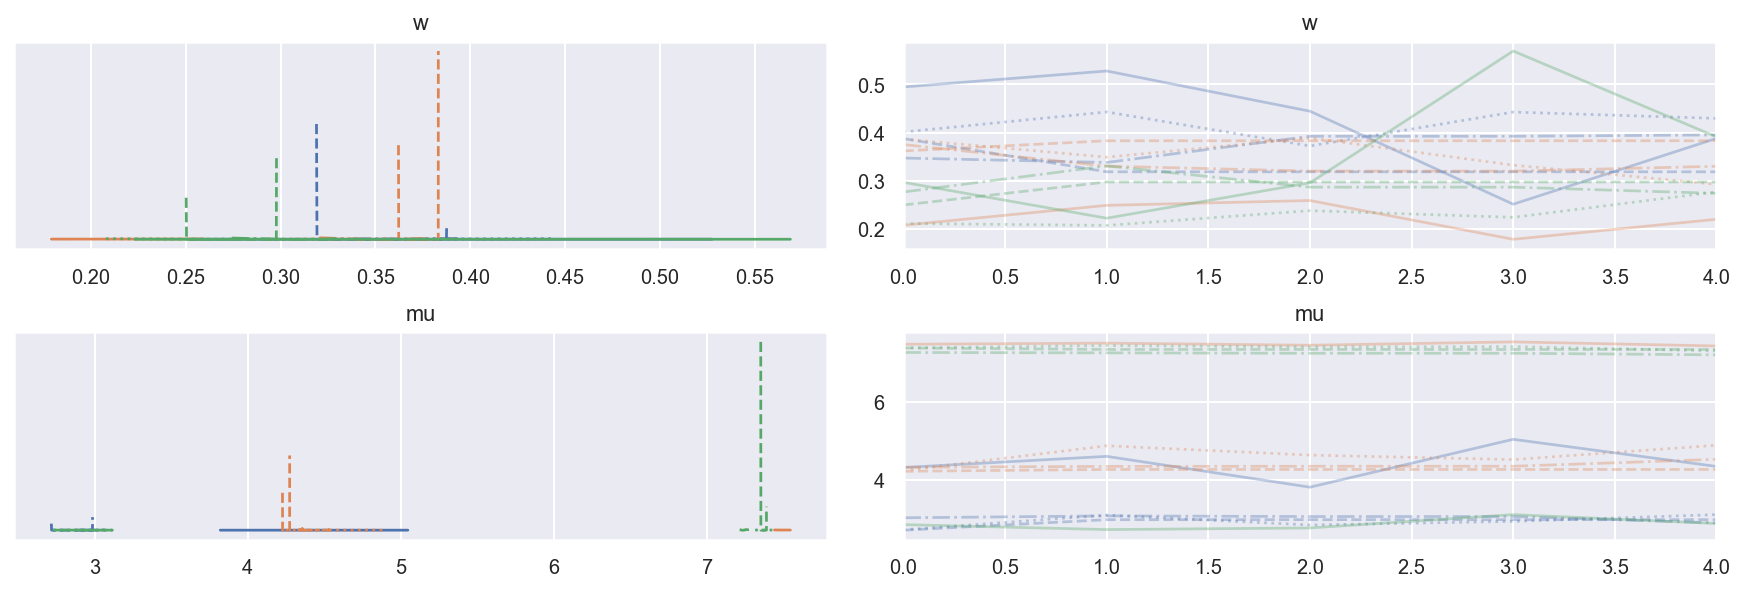

In [535]:
az.plot_trace(idata_pymc3, var_names=["w", "mu"]);

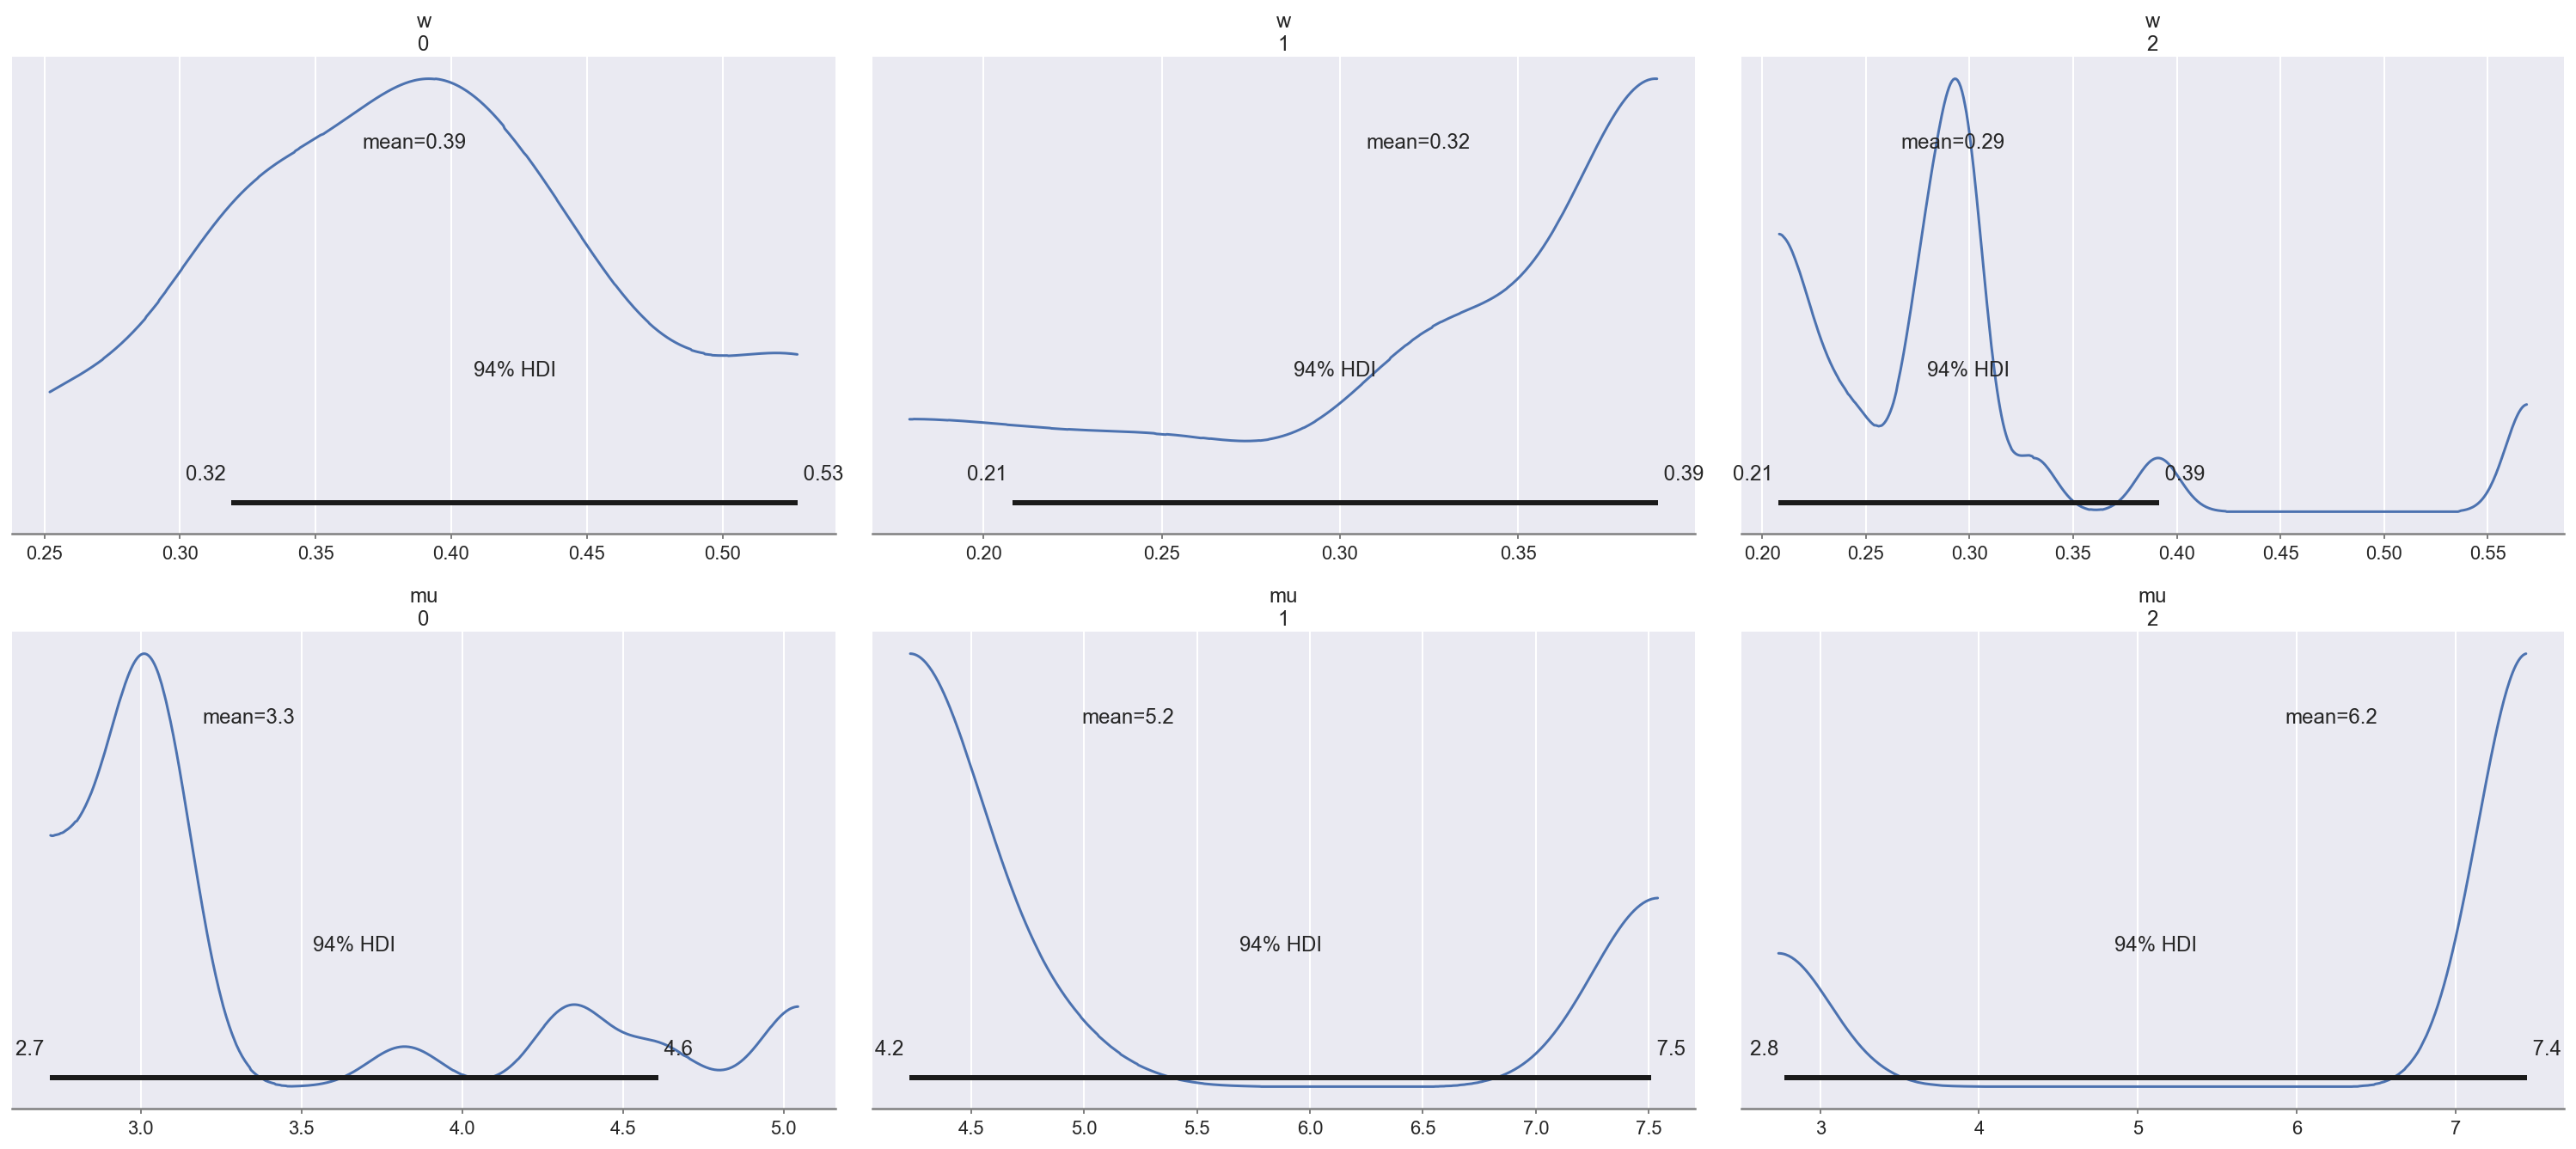

In [536]:
az.plot_posterior(idata_pymc3, var_names=["w", "mu"]);

<AxesSubplot:xlabel='x_obs'>

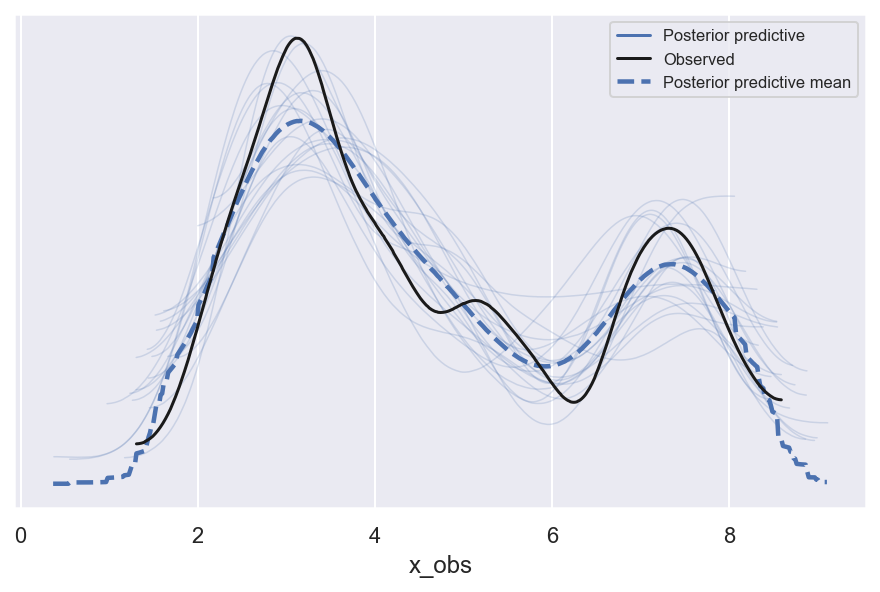

In [538]:
az.plot_ppc(idata_pymc3)

In [539]:
ppc_trace['x_obs'].shape

(20, 155)

In [543]:
prate_man_samples = ppc_trace['x_obs'].reshape(-1)

In [545]:
prate_man_samples.shape

(3100,)

(array([ 5., 23., 30., 35., 12.,  7.,  3., 14., 21.,  5.]),
 array([1.25455454, 1.99837983, 2.74220511, 3.4860304 , 4.22985569,
        4.97368098, 5.71750626, 6.46133155, 7.20515684, 7.94898213,
        8.69280742]),
 <BarContainer object of 10 artists>)

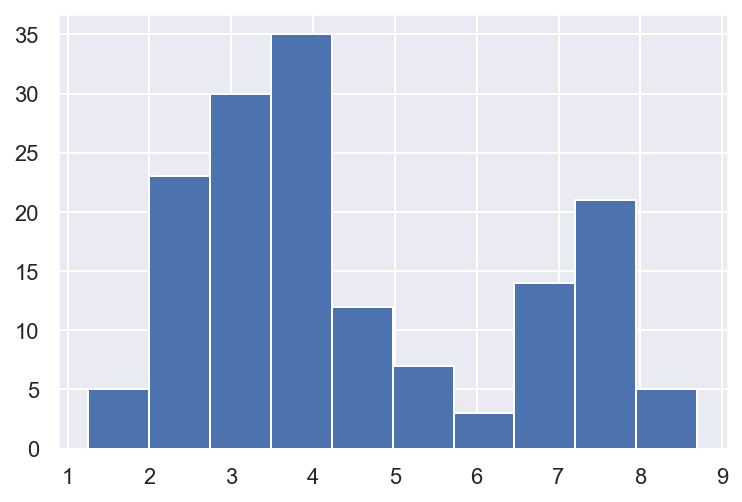

In [541]:
plt.hist(ppc_trace['x_obs'][3])

prate woman

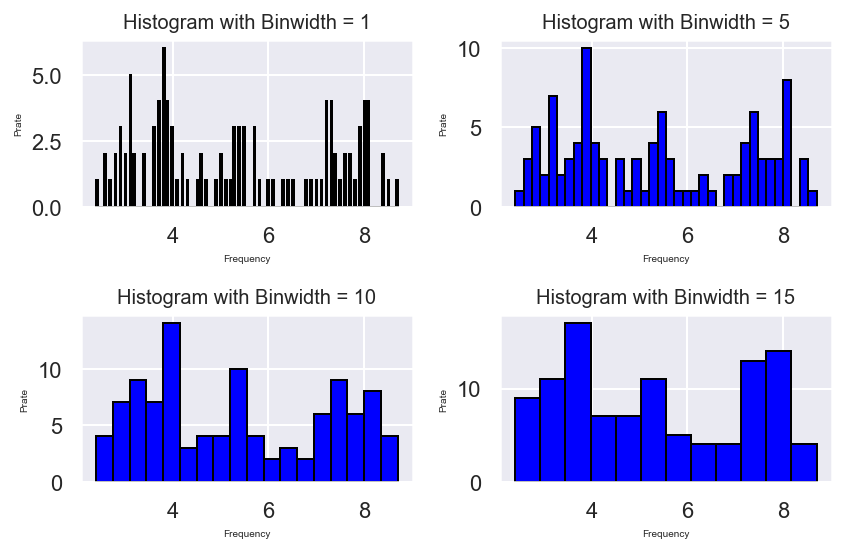

In [546]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(prate_woman, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Frequency', size = 5)
    ax.set_ylabel('Prate', size= 5)

plt.tight_layout()
plt.show()

In [547]:
with pm.Model() as model:
    w = pm.Dirichlet("w", [1., 1., 1.])
    mu = pm.Normal("mu", 0.0, 10.0, shape=3)
    tau = pm.Gamma("tau", 1.0, 1.0, shape=3)

    x_obs = pm.NormalMixture("x_obs", w, mu, tau=tau, observed=prate_woman)

In [548]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5, step=step, start=start)
    

    # sample posterior predictive samples
    ppc_trace = pm.sample_posterior_predictive(trace, var_names=["x_obs"])
    print(ppc_trace['x_obs'].shape)

    # Get an arviz inference object
    idata_pymc3 = az.from_pymc3(trace, posterior_predictive=ppc_trace)

Only 5 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]


Sampling 4 chains for 1_000 tune and 5 draw iterations (4_000 + 20 draws total) took 16 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.02616966443478156, but should be close to 0.8. Try to increase the number of tuning steps.


(20, 106)


In [549]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],4.979,1.798,3.291,7.666,0.410,0.294,19.0,16.0,2.44
mu[1],5.450,1.482,3.675,7.689,0.338,0.242,19.0,19.0,5.97
mu[2],6.052,1.763,3.558,7.798,0.402,0.288,19.0,16.0,2.28
w[0],0.350,0.071,0.278,0.437,0.016,0.012,19.0,16.0,1.84
w[1],0.336,0.080,0.200,0.450,0.018,0.013,19.0,16.0,1.56
w[2],0.314,0.107,0.148,0.498,0.024,0.017,19.0,19.0,1.39
tau[0],2.215,0.956,0.847,4.179,0.218,0.156,19.0,19.0,1.29
tau[1],1.790,0.970,0.243,3.209,0.221,0.159,19.0,19.0,4.93
tau[2],3.003,1.546,0.932,5.057,0.352,0.253,19.0,16.0,2.22


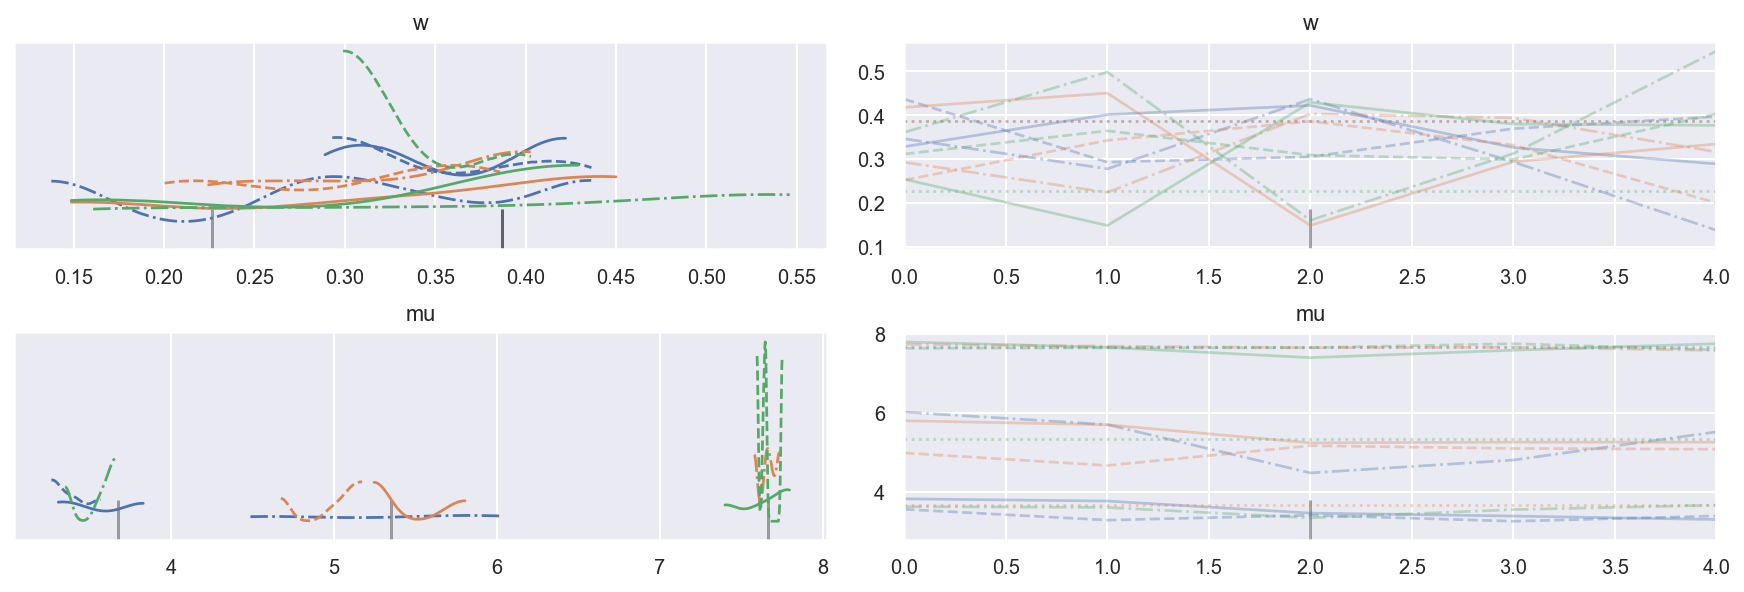

In [550]:
az.plot_trace(idata_pymc3, var_names=["w", "mu"]);

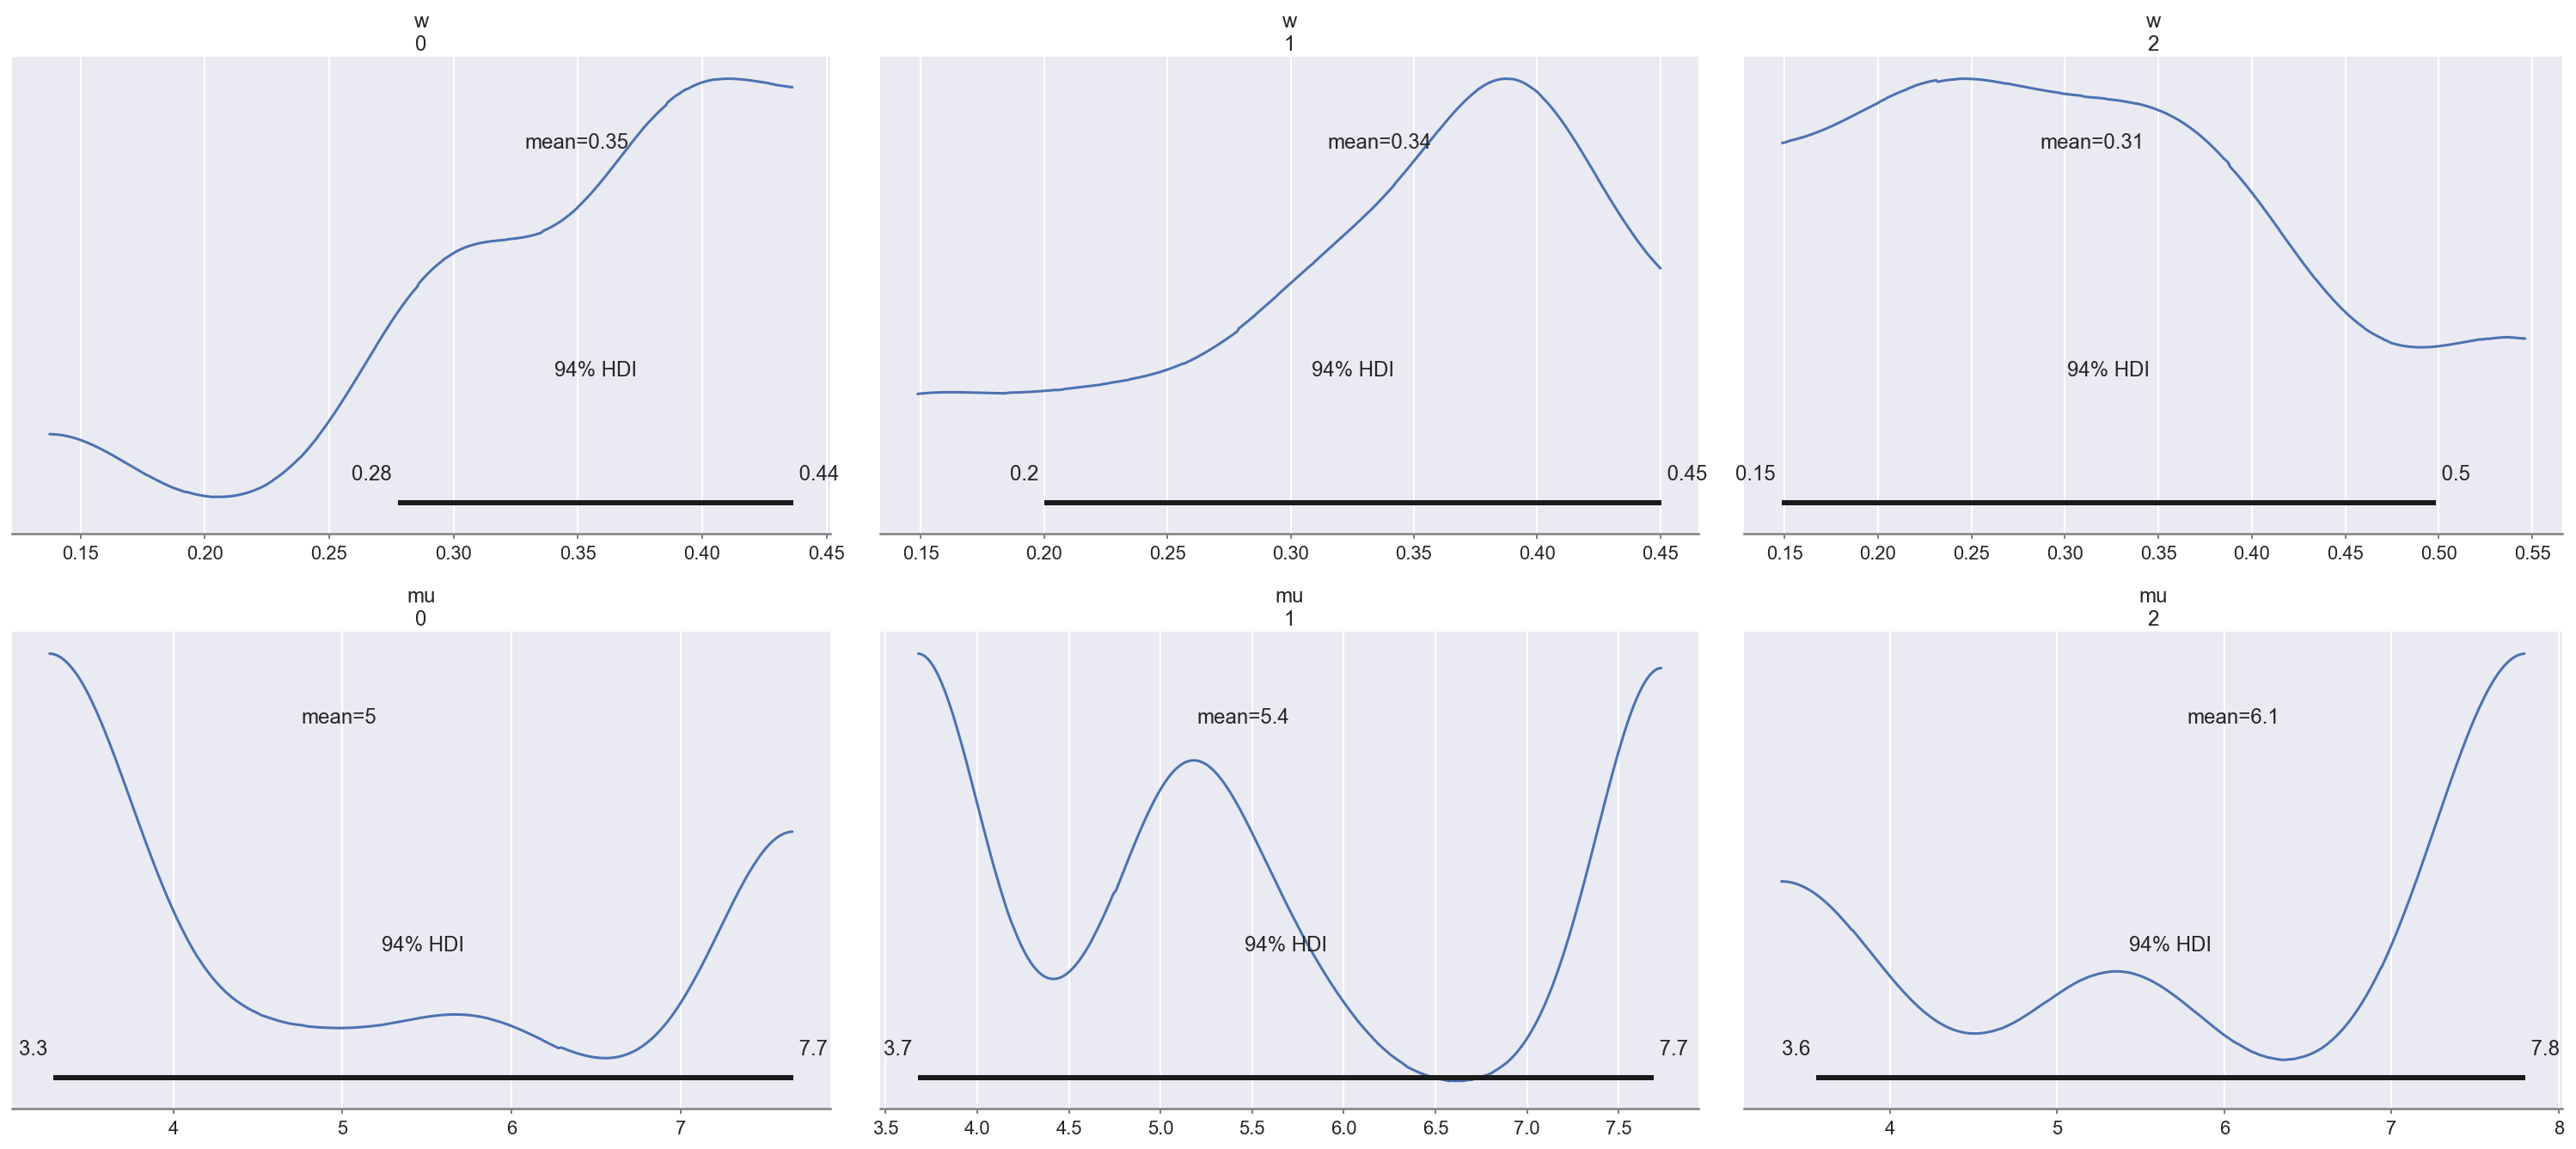

In [551]:
az.plot_posterior(idata_pymc3, var_names=["w", "mu"]);

<AxesSubplot:xlabel='x_obs'>

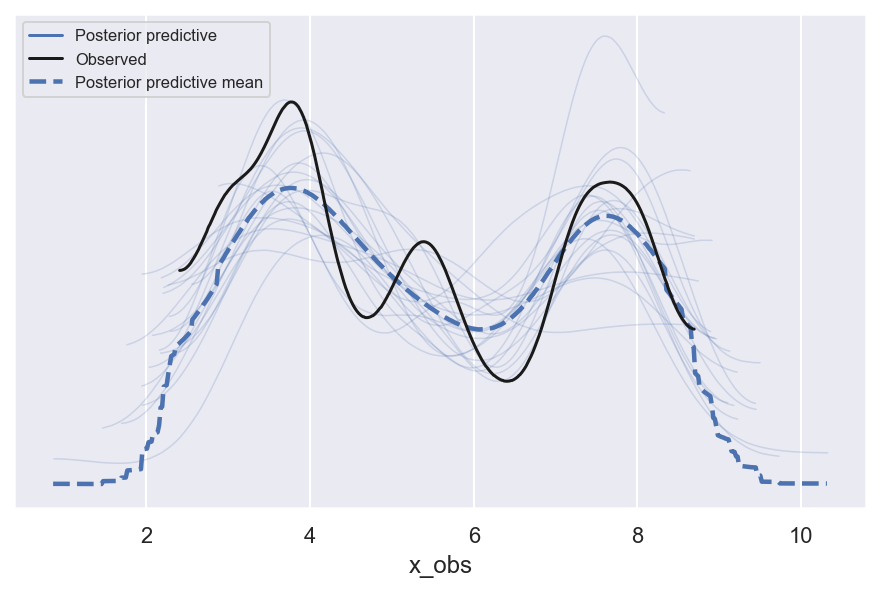

In [552]:
az.plot_ppc(idata_pymc3)

In [555]:
ppc_trace['x_obs'].shape

(20, 106)

In [556]:
prate_woman_samples = ppc_trace['x_obs'].reshape(-1)

In [557]:
prate_woman_samples.shape

(2120,)

(array([ 5., 23., 30., 35., 12.,  7.,  3., 14., 21.,  5.]),
 array([1.25455454, 1.99837983, 2.74220511, 3.4860304 , 4.22985569,
        4.97368098, 5.71750626, 6.46133155, 7.20515684, 7.94898213,
        8.69280742]),
 <BarContainer object of 10 artists>)

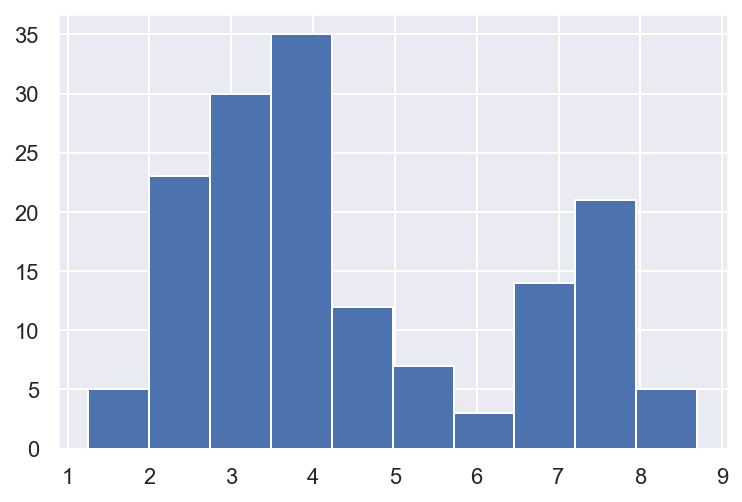

In [541]:
plt.hist(ppc_trace['x_obs'][3])

In [ ]:
prate_woman_samples
prate_man_samples

In [563]:
prate_man_samples.shape[0] 

3100

In [562]:
prate_woman_samples.shape[0]

2120

In [502]:
prate_sample.shape
prate_sample[100:120]

array([8.16360403, 4.04425875, 5.24388694, 4.89171415, 6.63910229,
       7.076094  , 5.74908199, 6.56030277, 4.00719962, 4.52535592,
       6.83739783, 2.8913633 , 4.02043538, 4.2652803 , 7.42594958,
       3.09207718, 4.87393934, 2.74113292, 6.74446195, 2.63773633])

In [503]:
gender_sample.shape
gender_sample[100:120]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [504]:
clin_sample.shape
clin_sample[100:120]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [506]:
dept_sample.shape
dept_sample[100:120]

array([5, 4, 5, 5, 2, 5, 4, 3, 2, 1, 1, 2, 6, 1, 2, 5, 4, 5, 2, 1])

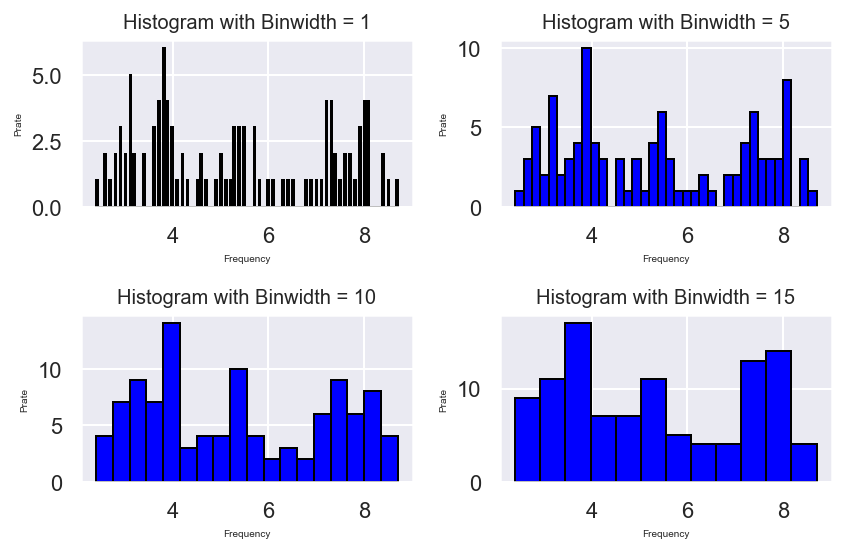

In [531]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(prate_woman, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Frequency', size = 5)
    ax.set_ylabel('Prate', size= 5)

plt.tight_layout()
plt.show()

In [670]:
dept_man_samples.shape, clin_man_samples.shape, cert_man_samples.shape, prate_man_samples.shape, exper_man_samples.shape

((3200,), (3100,), (3200,), (3100,), (3100,))

In [682]:

data = {'Dept': dept_man_samples,
           'Clin':clin_man_samples,
           'Cert': cert_man_samples,
           'Prate':prate_man_samples,
           'Exper': exper_man_samples,
            'Gender': 1
        }

sample_man_df = pd.DataFrame(data, columns = ['Dept', 'Clin', 'Cert', 'Prate', 'Exper', 'Gender'])

print(sample_man_df)

      Dept  Clin  Cert     Prate  Exper  Gender
0        1     1     1  6.589114     14       1
1        3     1     1  7.040213     14       1
2        6     1     1  3.460027      5       1
3        5     1     1  4.897271     25       1
4        5     0     1  2.178953      2       1
...    ...   ...   ...       ...    ...     ...
3095     1     1     0  7.234504     13       1
3096     1     0     1  6.703741     18       1
3097     5     0     1  4.285028     16       1
3098     5     1     1  3.670198     14       1
3099     5     0     0  2.025644      5       1

[3100 rows x 6 columns]


In [683]:

data = {'Dept': dept_woman_samples,
           'Clin':clin_woman_samples,
           'Cert': cert_woman_samples,
           'Prate':prate_woman_samples,
           'Exper': exper_woman_samples,
            'Gender': 0
        }

sample_woman_df = pd.DataFrame(data, columns = ['Dept', 'Clin', 'Cert', 'Prate', 'Exper', 'Gender'])

print(sample_woman_df)

      Dept  Clin  Cert     Prate  Exper  Gender
0        3     0     0  4.281224      2       0
1        3     1     0  3.213643      4       0
2        5     1     0  6.769632      6       0
3        1     1     1  3.083815      5       0
4        2     1     1  4.858554      8       0
...    ...   ...   ...       ...    ...     ...
2115     4     0     1  8.643136      4       0
2116     2     0     1  4.992907      1       0
2117     4     1     1  6.970208      4       0
2118     6     0     1  7.402272      5       0
2119     4     0     0  8.333681      6       0

[2120 rows x 6 columns]


In [684]:

frames = [sample_man_df, sample_woman_df]

result = pd.concat(frames)

In [686]:
result.shape

(5220, 6)

In [689]:
result.to_csv('sample_data.csv', index=False)